# datavis.py example

This notebook will demonstrate how the functions within the `datavis.py` module can be used to easily visualize your data and fit results. It can often be useful to plot your data and the result of the automatic peak fitting. `datavis.py` provides a set of premade plotting functions to allow for simple generation of standard and customized plots.

In this notebook we will explore how each function can be used and look at some examples.

In [1]:
# import modules
import h5py
import matplotlib.pyplot as plt
from ramandecompy import datavis
from ramandecompy import dataprep

An example data file will be used for these demonstrations that consists of formic acid decomposition data at 390C at a number of residence times. The values are not important but we will aim to demonstrate how `datavis.py` can be used to visualize data contained within stored hdf5 files.

First we will use `dataprep.view_hdf5()` (see dataprep_example for more details) to get an idea of what data stored within out hdf5 file. 

In [2]:
dataprep.view_hdf5('../ramandecompy/tests/test_files/datavis_example_data.hdf5')

**** ../ramandecompy/tests/test_files/datavis_example_data.hdf5 ****
390C
|    10s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10*
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13*
|    |    Peak_14*
|    |    Peak_15
|    |    Peak_16*
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    15s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenum

### datavis.pseudo_voigt
    Function that calculates a pseudo-voigt distribution over a given x_data range.
    Later functions within the module will automaticaly extract the necessary values
    directly from a designated .hdf5 file.

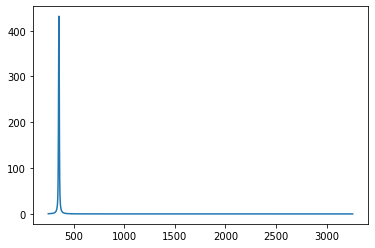

In [3]:
# first open the hdf5 file for reading
hdf5 = h5py.File('../ramandecompy/tests/test_files/datavis_example_data.hdf5', 'r')
# extract example wavenumber (x_axis) data into a list
x_data = list(hdf5['390C/10s/wavenumber'])
# extract the peak parameters for the first peak from dataset
peak_list = list(hdf5['390C/10s'].keys())[:-3]
peak_params = list(list(hdf5['390C/10s/{}'.format(peak_list[0])])[0])
fraction, sigma, center, amplitude = peak_params[0:4]
# close hdf5 file
hdf5.close()

# calculate pseudo voigt distribution from peak_params
y_data = datavis.pseudo_voigt(x_data, amplitude, center, sigma, fraction)

# plot the resulting pseudo-voigt profile to visualize the results
plt.plot(x_data, y_data)

### datavis.plot_component
    This function will automatically extract the values which needed to be manually extracted
    for the previous example and then plot the results onto an existing plot the color of each
    subsequent peak will automatically be changed but the user does have the option to specify
    the color if desired. This function is most useful when the spectra data is already plotted
    and you want to highlight a specific peak. We will see this type of example later.

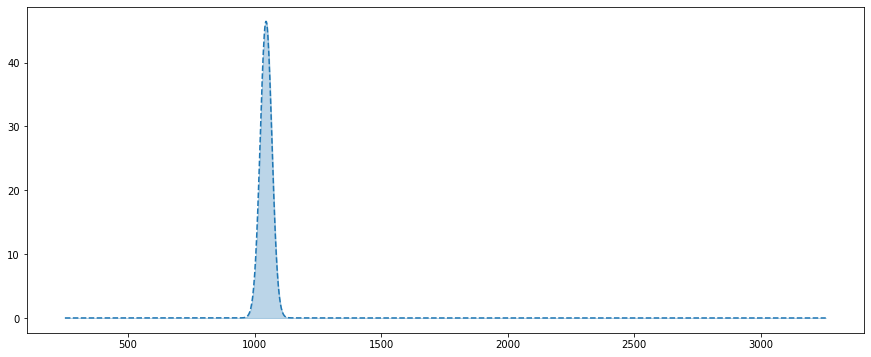

In [4]:
# first create a blank plot
fig, ax = plt.subplots(figsize=(15,6))
#plot the 10th peak pseudo-voigt profile only
datavis.plot_component(ax, '../ramandecompy/tests/test_files/datavis_example_data.hdf5',
                       '390C/10s', 10)

### datavis.plot_components
    This is an function that allows for multiple components to be plotted simultaniously from
    a list of desired peaks. This wrapper function does not allow for custom colors, that would
    require plotting each component individually using 

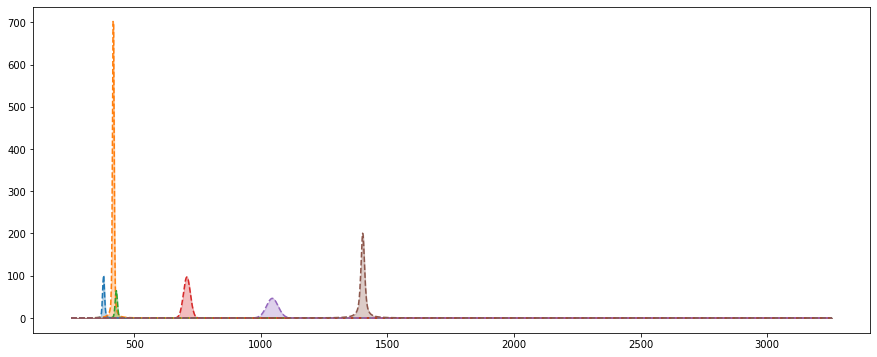

In [5]:
# first create a blank plot
fig, ax = plt.subplots(figsize=(15,6))
# not a list of peak numbers to be plotted
peak_list = [2,3,4,6,10,16]
#plot the list of peak components
datavis.plot_components(ax, '../ramandecompy/tests/test_files/datavis_example_data.hdf5',
                       '390C/10s', peak_list)

### datavis.plot_fit
    This is a complete wrapper function that allows for quick and easy viewing of any spectra
    saved within an hdf5 file along with the fit and the residuals. In addition, the labels for
    each peak are also extracted from the hdf5 file and applied to the plot. This function can
    be extremely useful for spot-checking your data analysis and to explore the contents of
    hdf5 data files.

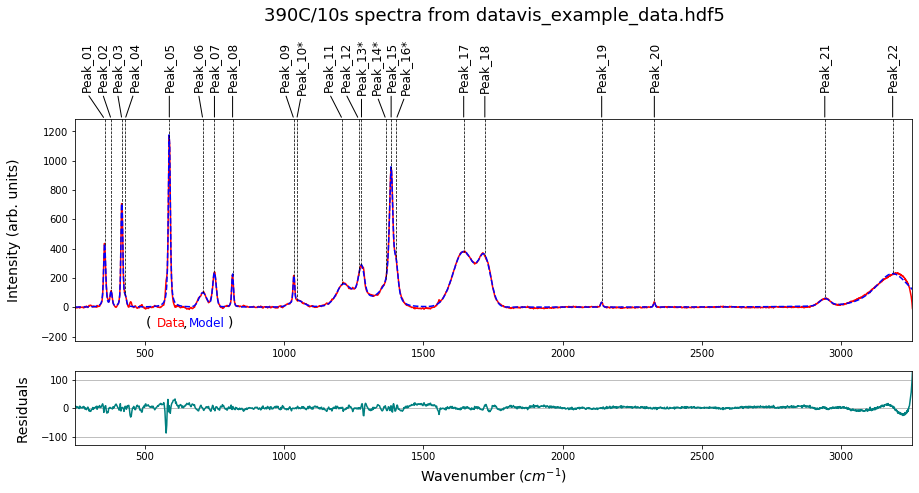

In [6]:
# plot the fit and data for the experiment conducted at 390C with a residence time of 10s
fig, ax1, ax2 = datavis.plot_fit('../ramandecompy/tests/test_files/datavis_example_data.hdf5', '390C/10s')

As mentioned previously it is also possible to then use datavis.plot_components to show as many or as few individual pseudo-voigt profiles to the plot

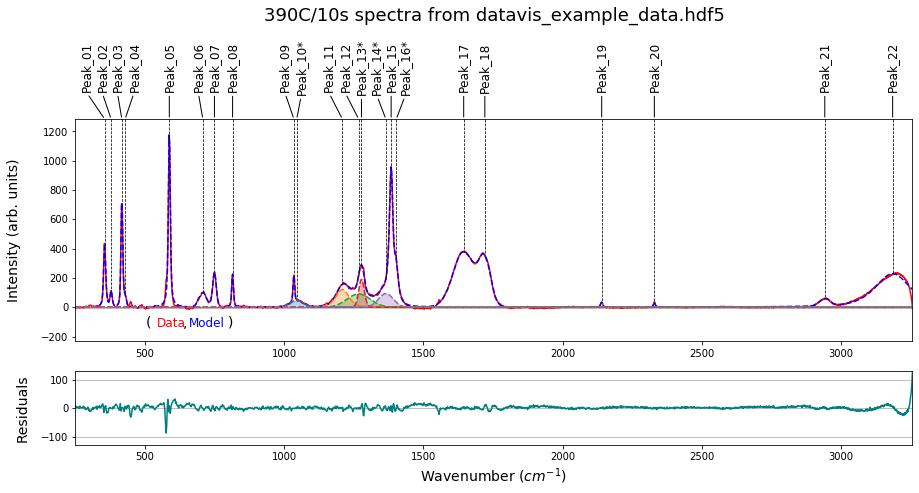

In [7]:
# plot the fit and data for the experiment conducted at 390C with a residence time of 10s
fig, ax1, ax2 = datavis.plot_fit('../ramandecompy/tests/test_files/datavis_example_data.hdf5', '390C/10s')
# add a list of components pseudo-voigt profiles to the plot
peak_list = [10,11,12,13,14]
datavis.plot_components(ax1, '../ramandecompy/tests/test_files/datavis_example_data.hdf5',
                       '390C/10s', peak_list)

## 3D plotting functions

In order to view spectra data as a function of residence time it is necessary to plot on a 3D axis. To do this a number of different functions are used.

### datavis.polygon_under_graph
    This function is used in the background and is necessary in order to plot filled areas
    in a 3D axis. The datavis.plot_3D_component utilizes it.
    
### datavis.plot_temp
    This is the primary 3D plotting function available as a part of ramandecompy.datavis.
    It will plot all the spectra saved within an hdf5 file for the specified temperature.

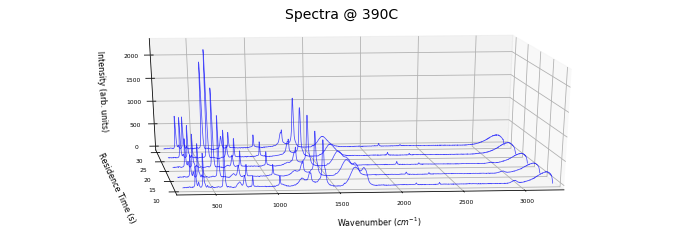

In [8]:
# plot all spectra saved within the hdf5 file for a specified temperature (390C)
fig, ax = datavis.plot_temp('../ramandecompy/tests/test_files/datavis_example_data.hdf5', 390)

### datavis.plot_3D_component
    This function can be used, similarly to to datavis.plot_component to add a shaded area
    showing the pseudo-voigt profile of the specified peak. For example the impact on the
    relatie intensity of formic acid peaks can be highlighted.

Text(0.5, 0.5132188731375618, 'Pseudo-Voigt Profiles for Formic Acid @ 390C')

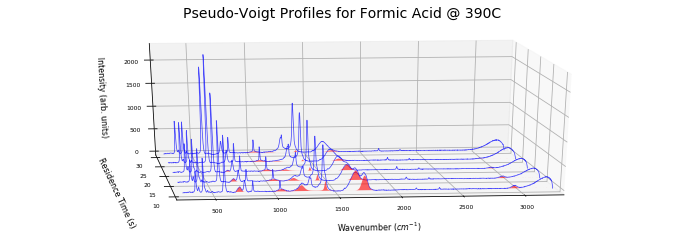

In [9]:
hdf5_filename = '../ramandecompy/tests/test_files/datavis_example_data.hdf5'
temp = 390

# plot all spectra saved within the hdf5 file for a specified temperature (390C)
fig, ax = datavis.plot_temp(hdf5_filename, temp)
# plot the components that are from formic acid
datavis.plot_3D_component(ax, hdf5_filename, temp, 6)
datavis.plot_3D_component(ax, hdf5_filename, temp, 10)
datavis.plot_3D_component(ax, hdf5_filename, temp, 11)
datavis.plot_3D_component(ax, hdf5_filename, temp, 16)
datavis.plot_3D_component(ax, hdf5_filename, temp, 18)
datavis.plot_3D_component(ax, hdf5_filename, temp, 21)
# add a custom plot title
ax.set_title('Pseudo-Voigt Profiles for Formic Acid @ 390C', fontsize=14, pad=100)